# IBM Developer Skills Network

# Spartial Operation using OpenCV

In [ ]:
# All images are in previous lessons

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [2]:
# Plot 2 images side by side
def plot_image(image_1, image_2,title_1="Orignal",title_2="New Image"):
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB))
    plt.title(title_1)
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB))
    plt.title(title_2)
    plt.show()

# Linear filtering

Filtering involves enhancing an image, for example removing the Noise from an image. Noise is caused by a bad camera or bad image compression. The same factors that cause noise may lead to blurry images, we can apply filters to sharpening these images. Convolution is a standard way to Filter an image the filter is called the kernel and different kernels perform different tasks. In addition, Convolution is used for many of the most advanced artificial intelligence algorithms. We simply take the dot product of the kernel and as an equally-sized portion of the image. We then shift the kernel and repeat.

[[[125 137 226]
  [125 137 226]
  [133 137 223]
  ...
  [122 148 230]
  [110 130 221]
  [ 90  99 200]]

 [[125 137 226]
  [125 137 226]
  [133 137 223]
  ...
  [122 148 230]
  [110 130 221]
  [ 90  99 200]]

 [[125 137 226]
  [125 137 226]
  [133 137 223]
  ...
  [122 148 230]
  [110 130 221]
  [ 90  99 200]]

 ...

 [[ 60  18  84]
  [ 60  18  84]
  [ 58  27  92]
  ...
  [ 84  73 173]
  [ 76  68 172]
  [ 79  62 177]]

 [[ 57  22  82]
  [ 57  22  82]
  [ 62  32  96]
  ...
  [ 79  70 179]
  [ 81  71 181]
  [ 81  74 185]]

 [[ 57  22  82]
  [ 57  22  82]
  [ 62  32  96]
  ...
  [ 79  70 179]
  [ 81  71 181]
  [ 81  74 185]]]


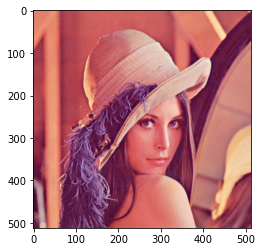

In [3]:
image = cv2.imread('lenna.png')
print(image)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

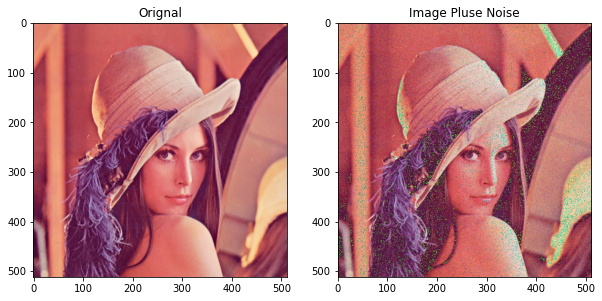

In [7]:
# Get rows, cols number
rows, cols, _ = image.shape

# noise - mean 0 std 15
noise = np.random.normal(0, 15, (rows, cols, 3)).astype(np.uint8)

# Add noise to image
noisy_image = image + noise

plot_image(image, noisy_image, title_1="Orignal",title_2="Image Pluse Noise")

## Filtering noise

In [8]:
# create a 6x6 kernel, each value is 1/36
kernel = np.ones((6,6))/36

The function filter2D performs 2D convolution between the image src and the kernel on each color channel independently. <br>
The parameter ddepth has to do with the size of the output image, we will set it to -1 so the input and output are the same size.

In [9]:
image_filtered = cv2.filter2D(src=noisy_image, ddepth=-1, kernel=kernel)

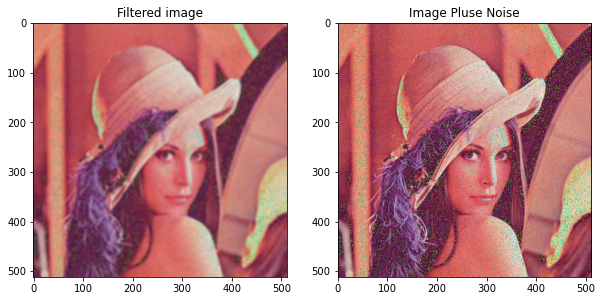

In [10]:
plot_image(image_filtered, noisy_image,title_1="Filtered image",title_2="Image Pluse Noise")

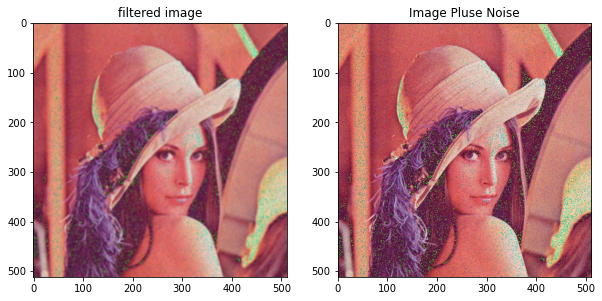

In [12]:
# A smaller kernel is sharper
kernel = np.ones((4,4))/16
image_filtered = cv2.filter2D(src=noisy_image, ddepth=-1, kernel=kernel)
plot_image(image_filtered , noisy_image,title_1="filtered image",title_2="Image Pluse Noise")

## Gaussian blur

The function GaussianBlur convolves the source image with the specified Gaussian kernel It filters noise but does a better job of preserving the edges

- src input image; the image can have any number of channels, which are processed independently
- ksize: Gaussian kernel size
- sigmaX Gaussian kernel standard deviation in the X direction
- sigmaY Gaussian kernel standard deviation in the Y direction; if sigmaY is zero, it is set to be equal to sigmaX

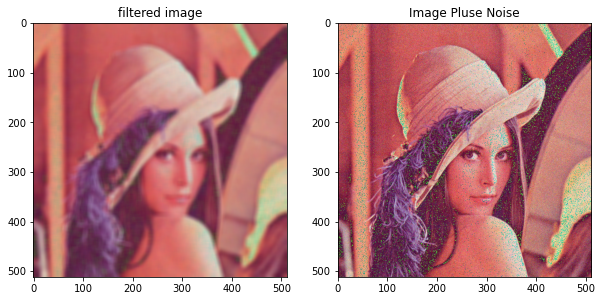

In [13]:
image_filtered = cv2.GaussianBlur(noisy_image, (11, 11), sigmaX=10, sigmaY=10)
plot_image(image_filtered , noisy_image,title_1="filtered image",title_2="Image Pluse Noise")

## Image sharpening

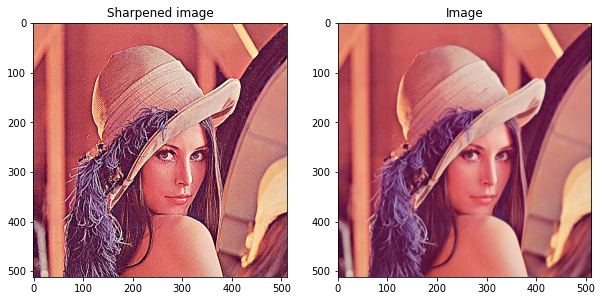

In [14]:
kernel = np.array([[-1,-1,-1],
                   [-1, 9,-1],
                   [-1,-1,-1]])
sharpened = cv2.filter2D(image, -1, kernel)
plot_image(sharpened , image, title_1="Sharpened image",title_2="Image")

## Edges

Edges are where pixel intensities change. The Gradient of a function outputs the rate of change; <br> we can approximate the gradient of a grayscale image with convolution. <br> There are several methods to approximate the gradient, let’s use the Sobel edge detector. <br> This combines several convolutions and finding the magnitude of the result. Consider the following image:

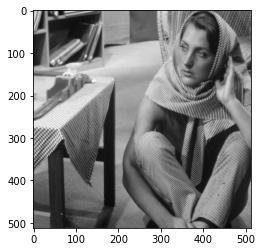

In [15]:
img_gray = cv2.imread('barbara.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(img_gray ,cmap='gray')

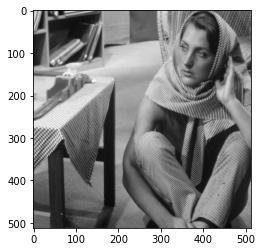

In [16]:
# Smooth the image
img_gray = cv2.GaussianBlur(img_gray, (3,3), sigmaX=0.1, sigmaY=0.1)
plt.imshow(img_gray ,cmap='gray')

We can approximate the derivative in the X or Y direction  using the <code>Sobel</code> function, here are the parameters:

<p><code>src</code>: input image</p>
<p><code>ddepth</code>: output image depth, see combinations; in the case of 8-bit input images it will result in truncated derivatives</p>
<p><code>dx</code>: order of the derivative x</p>
<p><code>dx</code>: order of the derivative y</p>
<p><code>ksize</code> size of the extended Sobel kernel; it must be 1, 3, 5, or 7</p>

In [17]:
ddepth = cv2.CV_16S
grad_x = cv2.Sobel(src=img_gray, ddepth=ddepth, dx=1, dy=0, ksize=3)

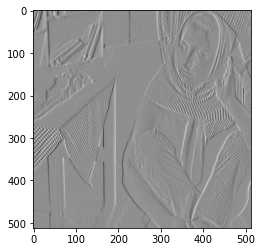

In [18]:
plt.imshow(grad_x, cmap='gray')

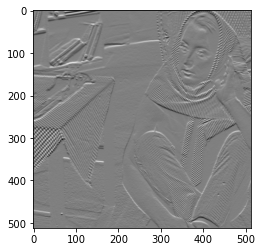

In [21]:
# apply filter on the image in the X direction
grad_y = cv2.Sobel(src=img_gray, ddepth=ddepth, dx=0, dy=1, ksize=3)
plt.imshow(grad_y, cmap='gray')

We can approximate the gradient by calculating absolute values, and converts the result to 8-bit:

In [22]:
abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)

In [23]:
# Adds the derivative in the X and Y direction
grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

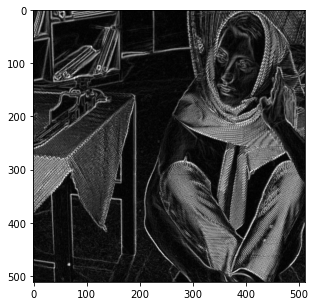

In [25]:
# Make the figure bigger and renders the image
plt.figure(figsize=(5,5))
plt.imshow(grad,cmap='gray')

## Median

Median filters find the median of all the pixels under the kernel area and the central element is replaced with this median value.

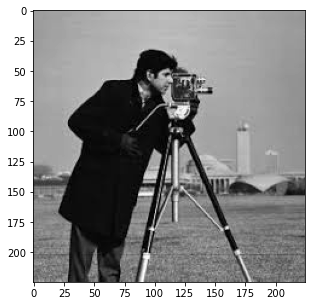

In [27]:
image = cv2.imread('cameraman.jpeg', cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(5, 5))
plt.imshow(image, cmap='gray')

Now let's apply a Median Filter by using the medianBlur function. The parameters for this function are src: The image and ksize: Kernel size

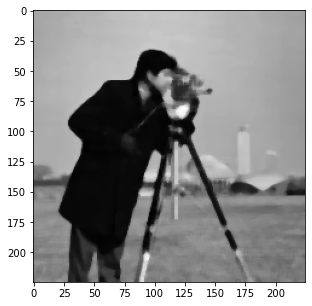

In [28]:
filtered_image = cv2.medianBlur(image, 5)
plt.figure(figsize=(5, 5))
plt.imshow(filtered_image, cmap='gray')

# Threshold Function Parameters

`src`: The image to use
`thresh`: The threshold
`maxval`: The maxval to use
`type`: Type of filtering

The threshold function works by looking at each pixel's grayscale value and assigning a value if it is below the threshold and another value if it is above the threshold. In our example the threshold is 0 (black) and the type is binary inverse so if a value is above the threshold the assigned value is 0 (black) and if it is below or equals the threshold the maxval 255 (white) is used. So if the pixel is 0 black it is assigned 255 (white) and if the pixel is not black then it is assigned black which is what THRESH_BINARY_INV tells OpenCV to do. This is how it would work without THRESH_OTSU.

Since we are using THRESH_OTSU it means that OpenCV will decide an optimal threshold. In our example below the threshold, we provide does not get used in the filter OpenCV will use an optimal one.


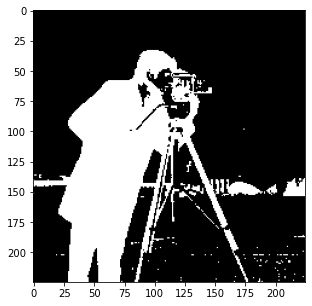

In [31]:
ret, outs = cv2.threshold(src = image, thresh=0, maxval=255, type=cv2.THRESH_OTSU + cv2.THRESH_BINARY_INV)
plt.figure(figsize=(5, 5))
plt.imshow(outs, cmap='gray')